# Solving Algebraic Equations

These exercises cover the basic ideas behind numerical methods for solving algebraic equations. For more detail on these concepts and how they are implemented in Python, please reference **Supplements 09 - 14**.

## Numerical Methods

Your mathematics and introductory engineering courses have given you a lot of problems that you were able to solve by hand (i.e., analytically) to obtain closed-form solutions using pencil-and-paper and, at most, a calculator. This is not generally the case in engineering practice, especially in reactor design.

We frequently have to solve equations or sets of equations that have no tractable analytical solution. These are usually, at best, tedious to solve by hand and, at worst, impossible to solve by hand. In these cases, we have to rely on numerical methods, which provide an approximation of the true solution. We will use numerical methods extensively in this course. so we will introduce a few of the key tools for solving various types of equations in this notebook, and then we'll get a lot of practice with them for the rest of the semester. Here, we will cover the basics of solving ***algebraic equations*** analytically, graphically, and using numerical methods. We will use these tools for solving problems in ***Chemical Equilibrium*** and ***Reactor Design***. 

## Topics Covered

1. Basic principles of root finding
2. Graphical root finding in 2D and 3D
3. Numerical methods for root finding (Iterative approaches, Newton-Raphson method)
6. Scipy package; `scipy.optimize`
7. Solution of algebraic equations with `optimize.newton()` (root finding for univariate functions).
8. Solving systems of nonlinear algebraic equations with `optimize.root` (root finding for multivariate functions).
9. The importance of initial guesses; strategies for providing good initial guesses to Equations solvers.
10. Stability issues with iterative solvers.

In [1]:
# I usually import all packages in a single cell so that I can keep everything in one place
# These are all of the packages used in this notebook
# For teaching purposes, I'll add packages as we need them throughout the notebook

import numpy as np
import matplotlib.pyplot as plt
import time
from scipy import optimize as opt

## Problem 01

Imagine we have an algebraic equation that we want to solve.  In this case, we'll consider a simple function:

$$f(x) = x^2 - 10x - 25$$

We want to find the root of that function, i.e., we want to find the value of $x$ where $f(x) = 0$.  So, with root finding, we are trying to solve for the value of $x$ that satisfies the equation below:

$$0 = x^2 - 10x - 25$$

### A Closed Form (Exact Analytical) Solution

This is pretty easy to solve--that is intentional. When you first test out numerical methods (which give approximate solutions), it is very helpful to know the correct answer so that you can make sure your numerical methods are working properly. In this case, I would just use the quadratic formula if I needed an exact solution:  

$$ x = -b \pm \frac{\sqrt{\left(b^2 - 4ac\right)}}{2a}$$

If we do that, we find that there are two solutions to this equation (two roots of the function):

\begin{align*}
    x &= 12.07107 \\
    x &= -2.07107
\end{align*}

But what if we had no idea how to solve the problem?  There are a number of things we might try.  First, if it is possible, I like to graph the function on the relevant domain. For univariate problems like this one, it is easy and illustrative to do this.

### A Graphical Solution

In the cell below, we plot the function of interest on a domain (set of $x$ values) of $x = [-20, 20]$. Roots are where the function crosses the x-axis (i.e., where $y = 0$).

In [2]:
# For graphing, we'll import pyplot.  
# Numpy is also useful here; it lets us create array and perform elementwise calculations

import numpy as np
import matplotlib.pyplot as plt

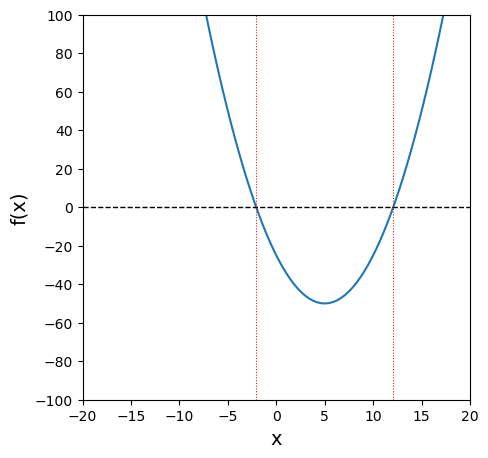

In [3]:
# We need to tell Python that f(x) = x^2 - 10x - 25 
def f(x):
    y = x**2 - 10*x - 25
    return y

# This creates a set of 100 x values between -20 and 20.
xplot = np.linspace(-20, 20, 100)
# print(xplot)

# This creates and displays a plot of f(x) vs. x
plt.figure(figsize = (5, 5))
plt.plot(xplot, f(xplot))

# Add formatting to figure to suit your specific needs and make a more informative figure.
plt.xlim(-20, 20)  #limits on x axis
plt.xticks(np.arange(-20, 21, 5)) #set x-ticks manually
plt.xlabel('x', fontsize = 14) #add x axis label at font size of 14 pt
plt.ylim(-100, 100) #set limits on y axis
plt.yticks(np.linspace(-100, 100, 11)) #set tickmarks on y axis
plt.ylabel('f(x)', fontsize = 14) #add lable on y axis at 14 pt font
plt.hlines(0, -20, 20, ls = 'dashed', color = 'black', lw = 1.0) #horizontal line at y =0
plt.vlines(-2.07107, -100, 100, ls = 'dotted', color = 'red', lw = 0.75) #vertical line at root 1
plt.vlines(12.07107, -100, 100, ls = 'dotted', color = 'red', lw = 0.75) #vertical line at root 2
plt.show() #display current figure

From this, we can see there is one root near $x = -2$, and there is another root near $x = 12$. This is consistent with our quadratic formula solution. Graphing isn't the most precise method, but it allows us to very quickly identify the rough location of roots, so it is extremely useful. Beyond this (assuming we cannot solve the problem analytically), we have to rely on numerical methods, which are usually iterative in nature. This means that we make a guess at the solution, we check the answer to see how close we are to zero, and then we change our guess based on how close we are to zero.  The hope is that we move steadily toward the solution as we continue to revise our guesses.

### Guess and Check: A Brute Force Numerical Method

The most basic example is an iterative guess-and-check strategy. We literally make a guess and keep changing it until we get close enough to our solution.  "Close enough" is the tolerance on our problem solution, and it depends on the level of precision we need in a particular problem. This is implemented in the cell below, where we repeatedly pass values of x to our function f(x) until it returns a value that is sufficiently close to zero for our satisfaction...

In [4]:
print(f(-10))    #gives 175
print(f(10))     #gives -25.  There is at least one root between -10 and 10 since I crossed the x-axis.
print(f(-5))     #gives 50....There is at least one root between 10 and -5 sice I crossed x again
print(f(-7))     #gives 94....that move was away from the root
print(f(-3))     #gives 14....relative to -5, that moves me toward the root
print(f(-1))     #gives -14...the root is somewhere between -1 and -3
print(f(-2))     #gives -1...close, but not quite there
print(f(-2.5))   #gives 6.25...too far
print(f(-2.1))   #gives 0.4...root must be between -2 and -2.1
print(f(-2.05))  #gives -.29...root is between -2.05 and -2.1
print(f(-2.075)) #gives 0.0556...root must be between -2.05 and -2.075
print(f(-2.07))  #gives -0.015...close enough.

175
-25
50
94
14
-14
-1
6.25
0.41000000000000014
-0.29749999999999943
0.05562499999999915
-0.015100000000000335


Although it is intuitive, guess and check is an inefficient way to solve this problem.  It requires me to inspect each solution and make decisions about my next guess. Although I can generally find the root of a simple univarate funtion like f(x) above, it is always tedious. Further, it is almost impossible to solve systems of nonlinear equations using a guess and check method. Generally speaking, it is preferable to use a formal numerical method to solve algebraic equations. These approaches are usually still iterative in nature, they just use more sophisticated mathematics to update guesses.  One of the most straightforward of these approaches is the Newton-Raphson method

### Newton-Raphson Method

As an example, we'll implement a Newton-Raphson iteration to solve this problem.  The Newton-Raphson iteration is much better than what we did above because it uses information about both the function value and its derivative to update guesses automatically.  The formula for the Newton-Raphson iteration is this:

$$x_{i+1} = x_i - \frac{f(x_i)}{f^\prime(x_i)}$$

We make an initial guess, $x_i$, then we update that guess by subtracting the ratio of the function value at $x_i$, $f(x_i)$, to its derivative at $x_i$, $f^\prime(x_i)$. The sign of the function value and the derivative of the function value ensure that guesses are updated in a fashion that moves them toward the root location.

A basic Newton-Raphson iteration is implemented in the cell below. The first few iterations are performed manually, and then we see how to automate the process with a while loop, which will continue to iterate until our specified criteria are met. You can see how quickly it converges for this simple example.  This is much, much better than a simple guess and check strategy.

In [5]:
import time

In [6]:
# We need to create functions for f(x) and f'(x); we do this with lambda functions here
x0 = -10
f  = lambda x: x**2 - 10*x - 25 #telling Python  f(x) = x^2 - 10x - 25
df = lambda x: 2*x  - 10        #telling Python df(x) = 2x - 10 

print(f(x0))
print(df(x0))
print(f'The value of                      x = {x0:3d}')
print(f'The value of the function      at x = {x0:3d} is {f(x0):3.2f}') #These are formatting string literals! Useful!!
print(f'The derivative of the function at x = {x0:3d} is {df(x0):3.2f}')

# manual illustration of the first few iterations
x1 = -10.0
print(f'{x1:7.3f}, {f(x1):8.3f}, {df(x1):7.3f}')
x2 = x1 - f(x1)/df(x1)
print(f'{x2:7.3f}, {f(x2):8.3f}, {df(x2):7.3f}')
x3 = x2 - f(x2)/df(x2)
print(f'{x3:7.3f}, {f(x3):8.3f}, {df(x3):7.3f}')
x4 = x3 - f(x3)/df(x3)
print(f'{x4:7.3f}, {f(x4):8.3f}, {df(x4):7.3f} \n')

# run a while loop until the NR iteration converges to within 1e-3 of zero.
x = -10
print(f'{x:14.3f}, {f(x):14.3f}')
# time.sleep(2)
while abs(f(x)) > 1e-1:
    x = x - f(x)/df(x)
    print(f'{x:14.7f}, {f(x):14.7f}')
    # time.sleep(2)
print("\n Loop is finished!")

175
-30
The value of                      x = -10
The value of the function      at x = -10 is 175.00
The derivative of the function at x = -10 is -30.00
-10.000,  175.000, -30.000
 -4.167,   34.028, -18.333
 -2.311,    3.445, -14.621
 -2.075,    0.056, -14.150 

       -10.000,        175.000
    -4.1666667,     34.0277778
    -2.3106061,      3.4449610
    -2.0749921,      0.0555139

 Loop is finished!


### More Robust Tools are available in Python (scipy)

Instead of writing our own solvers, we should *generally* use the numerical methods packages that are available in whatever software we're using. Under the hood, it's basically the same thing, but the packages in Python are generally more robust against instabilities that you may encounter when using iterative methodds. If you're using Python, the appropriate tools are found in the `optimize` module from the Scipy Package.

In the cell below, we illustrate how `scipy.opimize` works in practice. First, we import `optimize` and we alias it as `opt` just to make the syntax a little shorter and cleaner. Inside of `scipy.optimize` or `opt` as we will call it hereafter, there are many solvers available.  These include the classic Newton-Raphson algorithm, among many others. As an example, we can use `opt.newton()` to find the root of the above function.  The syntax is really straightforward.  All we need to do is pass the function handle (it's name) and an initial guess at the solution.  `opt.newton()` will handle the rest.

```{note}
Despite the name, `opt.newton` actually uses a secant method by default.
```

In [7]:
from scipy import optimize as opt

In [8]:
P01 = lambda x: x**2 - 10*x - 25 #telling Python  P1(x) = x^2 - 10x - 25
X0  = 10
opt.newton(P01, X0)
sol01 = opt.newton(P01, X0)
print(sol01)
print(P01(sol01))
print(f'The root of P01(x) with the current initial guess of X0 = {X0:3.2f} is {sol01:4.3f}; P01({sol01:4.3f}) = {P01(sol01):4.3E}.')

12.071067811865474
-1.4210854715202004e-14
The root of P01(x) with the current initial guess of X0 = 10.00 is 12.071; P01(12.071) = -1.421E-14.


## Problem 02

Solve the following algebraic equation for the smallest positive root:

$$x^3 - 10x + e^{-0.25x} = 35.75$$

### Solution to Problem 02

As we've discussed, if it is easy for me to graph a function, I usually do so because I need a good initial guess of the root location when I use numerical methods.  Graphing makes it very easy to see where the roots are. I'll plot this below by creating a **lambda** function.  I am using a lambda function because this is a very simple expression.  Specifically, I am going to create a function of the form:

$$f(x) = x^3 - 10x + \exp{(-0.25x)} - 35.75$$

Why do I write it that way?  Because I want to figure out where the function, $f(x)$, equals zero.  So in that form, I can graph the function and look for any places where $f(x)$ crosses the x axis.  Those are the places where f(x) = 0.

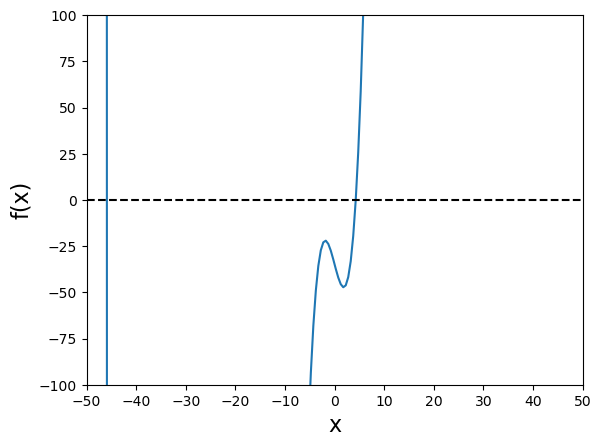

In [9]:
# creating the function with lambda syntax
P02 = lambda x: x**3 - 10*x + np.exp(-0.25*x) - 35.75 #translates to p1(x) = x^3 - 10x + exp(-0.25x) - 35.75

# I'll plot it from x = -50 to x = 50; create the set of x values as np.array using linspace.
xspan = np.linspace(-50, 50, 200)

# plot the function value for every value in xspan.
plt.plot(xspan, P02(xspan))

plt.hlines(0, -50, 50, linestyle = 'dashed', color = 'black')
plt.xlim(-10, 10)
plt.xticks(range(-50, 51, 10))
plt.ylim(-100, 100)
# plt.xticks(range(-10, 11, 1))
plt.xlabel('x', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)
plt.show()

We can see clearly that it crosses the x-axis in two places (this remains true even if we zoom out much further).  There is a root at about -45 and another at about 5.  We want the "smallest positive root" according to the problem statement, so we want to look around x = 5 for a root.

Unlike the first example problem, I do not have an easy way to solve this nonlinear equation analytically. I will therefore use a numerical method -- specifically, I will use solver from `scipy.optimize` that is designed to find the roots of univariate functions (functions that have only one argument). `opt.newton` is usually a fine choice here.  

In [10]:
sol02 = opt.newton(P02, 4) #opt.newton needs our function name and an initial guess.
print(sol02)
print(P02(sol02))

# For a more complete picture of the solution, uncomment code below.
opt.newton(P02, 4, full_output = True)
sol02, info = opt.newton(P02, 4, full_output = True)
print(sol02, '\n')
print(info)
print(info.converged)
print(info.iterations)
print('', sol02, '\n', info.converged, '\n', P02(info.root), '\n', info.flag)

4.275631645416588
-1.5702994460298214e-12
4.275631645416588 

      converged: True
           flag: converged
 function_calls: 6
     iterations: 5
           root: 4.275631645416588
         method: secant
True
5
 4.275631645416588 
 True 
 -1.5702994460298214e-12 
 converged


## Problem 3

Find all roots for the following system of equations. Search only on the domain $x = [-10, 10]$ and $y = [-10, 10]$.

\begin{align}
     10 &= 5x^2y - y^3\\
    -(15y+x) &= 2y^2 + \textrm{tanh}(0.075x)\\
\end{align}

### Solution to Problem 03

This is a system of nonlinear equations, and even adding a second equation, we see that things get more complicated.  We do not have a solution until we find the $(x,y)$ pairs where both of the equations are solved.  We are essentially looking for the roots of the following two functions with this problem:

\begin{align}
    f_1(x, y) &= 5x^2y - y^3 - 10 \\
    f_2(x, y) &= 2y^2 + \tanh{(0.075x)} + 15y + x\\
\end{align}

We have solved our problem when we find the values $\hat{x}$ and $\hat{y}$ that give the following result:

\begin{align}
    f_1(\hat{x}, \hat{y}) &= 0 \\
    f_2(\hat{x}, \hat{y}) &= 0 \\
\end{align}

I would love to be able to assess the problem graphically because that helps me to see axis crossings, but here, we have to work in 3-dimensions.  For every $(x,y)$ pair that we give to each function, it will return a "z" value in a third dimension...so this is harder to visualize. Both functions describe surfaces, not lines, and we need to find the $(x, y)$ points where both surfaces are equal to zero.

But, let's give it a try and see what we can come up with.  This is definitely **not** an essential step in solving this problem, but it serves a few purposes:

1. It gives us extra practice with graphing
2. It illustrates visually what root finding for systems of equations entails

First, let's create two functions that take (x,y) argument pairs and return the values of $f_1(x,y)$ and $f_2(x,y)$.  We can again use `lambda` syntax here because these are easy one-liners.

In [11]:
f1 = lambda x,y: 5*x**2*y - y**3 - 10
f2 = lambda x,y: 2*y**2 + np.tanh(0.075*x) + 15*y + x

#### Surface Plots

We have to visualize these functions in 3D, so our options are surface plots ("actual" 3D illustration) or contour plots (a 2D representation of a 3D surface using contour lines).  Let's start with the surfaces.

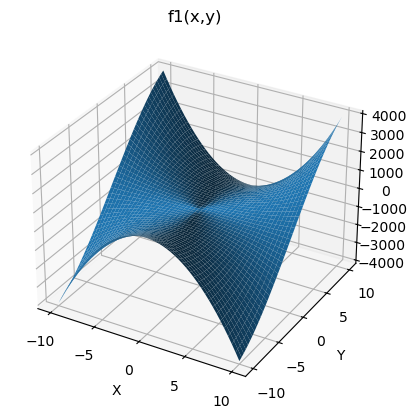

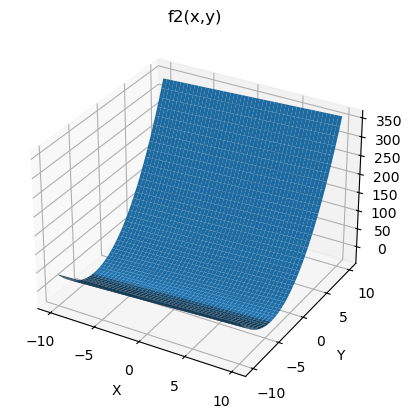

In [12]:
x = np.linspace(-10,10,50)
y = np.linspace(-10,10,50)
[X, Y] = np.meshgrid(x,y)

Z1 = f1(X,Y) #values of the left-hand side of f1 for all X,Y pairs
Z2 = f2(X,Y) #values of the left-hand side of f2 for all X,Y pairs.

fig1, ax1 = plt.subplots(subplot_kw={"projection": "3d"})
ax1.plot_surface(X, Y, Z1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('f1(x,y)')

fig2, ax2 = plt.subplots(subplot_kw={"projection": "3d"})
ax2.plot_surface(X, Y, Z2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('f2(x,y)')
plt.show()

So, that's fine?  I guess?  It doesn't really help me much, though.  What I need to find are the places where *both* surfaces intersect at values of zero, and that is almost impossible to determine from these 3D projections.

#### Overlaid Surface Plots

Maybe we can try to plot two surfaces on the same plot?

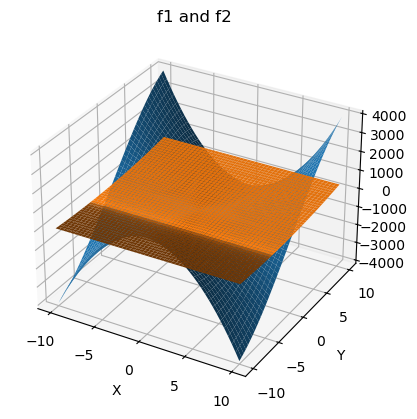

In [13]:
fig1, ax1 = plt.subplots(subplot_kw={"projection": "3d"})
ax1.plot_surface(X, Y, Z1)
ax1.plot_surface(X, Y, Z2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('f1 and f2')
plt.show()

Nope.  Not helpful.  I cannot really pin down any of locations of the roots using this.  Maybe contour plots?

#### Contour Plots

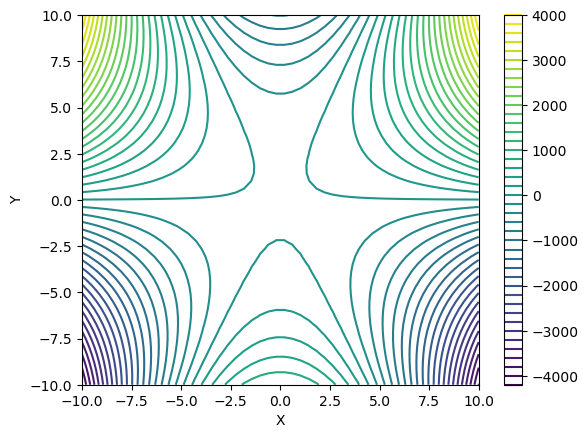

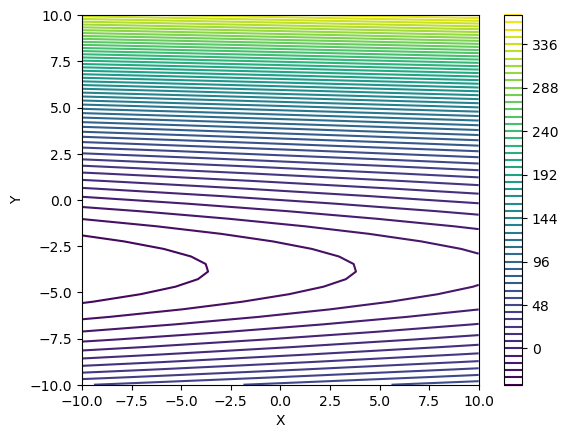

In [14]:
plt.figure()
plt.contour(X, Y, Z1, levels = 50) #note, levels = scalar tells us how many contour lines to use.
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()

plt.figure()
plt.contour(X, Y, Z2, levels = 50)
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()

Actually, this gives me a much clearer view of where the functions are near zero.  From the first plot, we can see that $f_1(x,y)$ is close to zero toward the center of the plot, and then as we move to large X and Y values, we see that the function gets either very positive or very negative.  In the second case, we see that $f_2(x,y)$ is close to zero over a fairly broad space between y = 3 and -7 or so...and x = -10 to 10.  

#### Overlay Contour Plots

If we put the above onto a single plot, it is a mess:

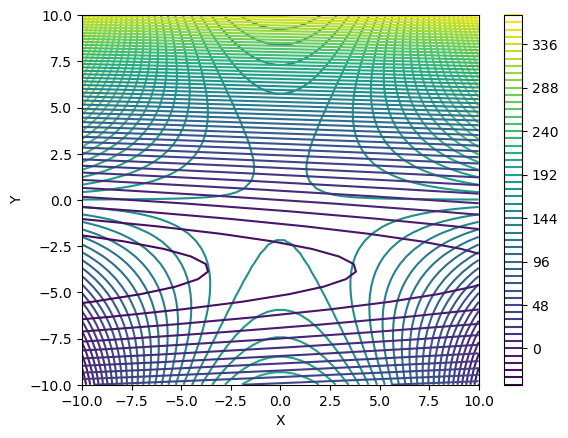

In [15]:
plt.figure()
plt.contour(X, Y, Z1, levels = 50) #note, levels = scalar tells us how many contour lines to use.
plt.contour(X, Y, Z2, levels = 50)
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()

#### Adjusting Contour Plot Options

It is very difficult to interpret this figure.  There is too much going on, and I can't identify where the intersections are where both $f_1(x,y)$ and $f_2(x,y)$ are near zero.  However, we can also use the level keyword argument to specify a range of contour lines...sort of like applying limits to the z axis.  I can also set the colors of contour lines to various things. Here, I'll show the contour lines for the first function in red and the second function in blue.  We will also only show the contours between -0.01 and 0.01 because these will bound any areas where the functions are zero pretty well.  With this, we can see clearly where both functions are zero(ish)--this is indicated by the lines on the contour plot below.  

**This is showing us where the two surfaces intersect at values of 0**

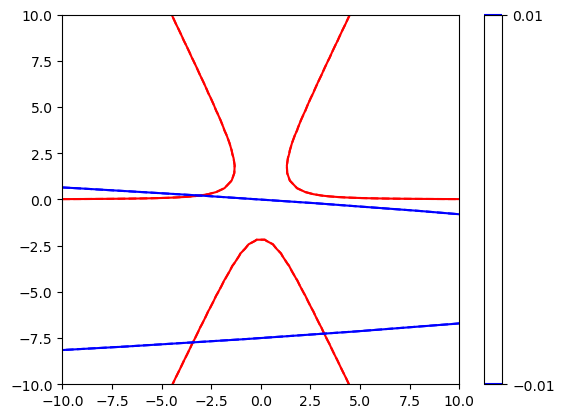

In [16]:
x = np.linspace(-10,10,50)
y = np.linspace(-10,10,50)
[X, Y] = np.meshgrid(x,y)

Z1 = f1(X,Y) #values of the left-hand side of f1 for all X,Y pairs
Z2 = f2(X,Y) #values of the left-hand side of f2 for all X,Y pairs.

plt.figure()
plt.contour(X, Y, Z1, levels = [-0.01, 0.01], colors = 'red')  #function 1 in red
plt.contour(X, Y, Z2, levels = [-0.01, 0.01], colors = 'blue') #function 2 in blue
plt.colorbar()
plt.show()

Now that makes it very clear that I have 3 roots on the domain $(X, Y) = [-10, 10]$.  Specifically, they are somewhere around:

1. $(-3, -8)$
2. $(3, -8)$
3. $(-3, 0)$

Now that I know this, I have a pretty good idea of initial guesses to make for x and y with my iterative solver routine.

#### Solving with `scipy.optimize.root()`

For a system of nonlinear equations, we can't use `opt.newton()` -- it only works on univariate functions.  Here, we need to solve functions that have two arguments, $x$ and $y$. We'll need to use `opt.root()` instead. This is a place where Python is picky about syntax.  We have to construct a function that models our system of equations...there are two rules we need to follow:

1. This function must take a single argument that contains all of the unknowns in a collection (list, array, tuple, etc.). In this example, we have to pass $x$ and $y$ in a single collection.
2. This function must return the values of all of the equations we're solving for a given set of argument values--this must be done in a collection (list, array, tuple, etc.). In this example, our function must return the values of ($f_1(x,y)$ and $f_2(x,y)$) for a given $(x^\prime,y^\prime)$ pair).

Here, the problem is complicated enough that lambda functions lose their charm.  We'll specify with a general function definition.

In [17]:
def P03(var): # var = [x, y]
    x = var[0]
    y = var[1]
    # print([x, y])
    LHS1 = 10 - 5*x**2*y + y**3  #this is function 1, solution at LHS1 = 0
    LHS2 = 2*y**2 + np.tanh(0.075*x) + 15*y + x  #this is function 2, solution at LHS2 = 0
    return [LHS1, LHS2] #return the value of f1 and f2 at current (x,y) values; I'm using a list.

Once we have that function defined in that particular format, then we can use `opt.root()` to solve it.  All it needs from us is the function name and an initial guess at the solution.  We have some pretty good ideas from the contour plot.  

`opt.root()` will return a "solution structure" that has a ton of information in it.  I'll call this `sol03` below, and we'll print the important fields from that solution:

1. The solution (`sol03.x`); this is our "answer to the problem"
2. The function value at the solution (`sol03.fun`); array of function values at solution; should all be zeros.
3. The message that tells us whether the solver converged or not (`sol03.message`)

In [18]:
var0 = [-3, -7] #I'm passing the initial guesses as a list; these unpack as x0 and y0 in the function
opt.root(P03, var0)
sol03  = opt.root(P03, var0)
print('', sol03.x, '\n', sol03.fun, '\n', P03(sol03.x), '\n', sol03.message)

 [-3.42272248 -7.73741349] 
 [ 9.66338121e-12 -6.21724894e-13] 
 [np.float64(9.663381206337363e-12), np.float64(-6.217248937900877e-13)] 
 The solution converged.


## Problem 04

Solve the following system of nonlinear equations:

\begin{align}
    0 &= x^2 - 10x - 25y + 17z^2\\
    18.3 &= xz + \textrm{ln}(yz)\\
    145 - y^2 &= x^2 + 5z\\
\end{align}

### Solution to Problem 04

Once you get the hang of formatting equations so that they are compatible with `opt.root()`, this is straightforward.  See below, and compare it to above. Think about how logically similar the two code cells are.  This one is a little bigger and a little more complex because I have 3 variables and 3 functions, but otherwise, everything is identical.  This is a super easy concept to generalize, and I can solve any number of equations in this way using `opt.root()`!!

In [19]:
def P04(var):
    x = var[0]
    y = var[1]
    z = var[2]
    LHS1 = x**2 - 10*x - 25*y + 17*z**2
    LHS2 = x*z + np.log(y*z) - 18.3
    LHS3 = x**2 + 5*z + y**2 - 145
    return [LHS1, LHS2, LHS3] #using a list, this is my choice.

var0 = [5, 5, 5]
sol04 = opt.root(P04, var0)
print('', sol04.x, '\n', sol04.fun, '\n', P04(sol04.x), '\n', sol04.message)

 [ 3.53330097 10.58103531  4.1114952 ] 
 [-2.97717406e-09 -9.44535117e-10 -2.59575472e-09] 
 [np.float64(-2.9771740628348198e-09), np.float64(-9.445351167869376e-10), np.float64(-2.595754722278798e-09)] 
 The solution converged.


## Stability of Nonlinear Equation Solvers

### Initial Guess Sensitivity and NaN errors in Problem 04

Although tools like `opt.newton` and `opt.root` are very easy to use, numerical solution of algebraic equations can be very tricky.  As a rule of thumb, the more equations that you are solving, and the more nonlinear these equations are, the more challening the numerical solution will be.  Usually, you need good-to-great initial guesses in order to solve difficult systems on nonlinear equations with numerical tools. 

Below, we demonstrate how certain initial guesses would cause the solver to go off the rails.  This problem is hard because visualizing it would require us to work in 4 dimensions since we have $f1(x, y, z)$, etc.  So providing good initial guesses can be tricky.

In a physical system, we usually have limits on the variables that I can use to provide a better guess.  For example, fractional conversions and mole fractions are between 0 and 1; absolute temperatures can't be less than zero; a temperature of 8000C is unrealistic in a chemical process; a pressure of 50000000 atm is unrealistic in a chemical process, etc.

Here, it's just a math problem, so we have no idea how to bound x, y, and z without putting in a bit of effort (not a topic for this course).

Anyway, we can show that an initial guess of:

    var0 = [5, -5, -5]

Will cause the solver to issue a warning since it ends up passing a negative value to the logarithm in the second equation, which is undefined (notice that it still converges, though.  It gets around the nan ("not a number") error here).  Astute readers will point out that $-5*-5 = 25$, so the negative signs should cancel, allowing us to evaluate the natural logarithm.  This is true at the start, but, remember, these are iterative processes.  We make initial guesses, and those guesses bias our solutions.  Just because the solver starts out with x and y both negative (and with a positive product), it won't necessarily stay here.  We demonstrate this in the cell below.  You can see that it hits places where only one of the two is negative; hence the error.

In [20]:
def P4_stability(var):
    x = var[0]
    y = var[1]
    z = var[2]
    # print(f'current values in iteration are x = {x}, y = {y}, z = {z}')
    LHS1 = x**2 - 10*x - 25*y + 17*z**2
    LHS2 = x*z + np.log(y*z) - 18.3
    LHS3 = x**2 + 5*z + y**2 - 145
    return np.array([LHS1, LHS2, LHS3])

var0 = np.array([5, -5, -5])
sol = opt.root(P4_stability, var0)
print('\n', sol)
# print('', sol.x, '\n', sol.fun, '\n', P4_stability(sol.x), '\n', sol.message)


  message: The solution converged.
 success: True
  status: 1
     fun: [-7.933e-11 -2.799e-11 -1.437e-10]
       x: [ 1.152e+01  2.202e+00  1.486e+00]
  method: hybr
    nfev: 42
    fjac: [[-4.840e-01 -4.714e-02 -8.738e-01]
           [ 8.750e-01 -3.513e-02 -4.828e-01]
           [ 7.939e-03  9.983e-01 -5.825e-02]]
       r: [-2.414e+01  8.664e+00 -3.839e+01 -2.431e+01  4.270e+01
            1.312e+01]
     qtf: [-3.095e-07 -2.683e-09  3.799e-08]


C:\Users\jqbon\AppData\Local\Temp\ipykernel_23332\3613340609.py:7: RuntimeWarning: invalid value encountered in log
  LHS2 = x*z + np.log(y*z) - 18.3


### An Extreme Example of instability with the Newton-Raphson Iteration

Although a Newton-Raphson iteration is very useful, it isn't always guaranteed to converge.  In general, you'll find this is true of algebraic solutions.  They can be flaky, and they are usually very sensitive to the initial guess that we make for the solution.  As the equations become increasingly nonlinear and difficult to solve, we will find we need very good initial guesses in order to get numerical methods to converge for algebraic equations. As an example, let's consider the more difficult function:

$$g(x) = -0.74 + 0.765x + 1.1x^2 - 3.55x^3$$

We'll graph it and then run a Newton-Raphson iteration.

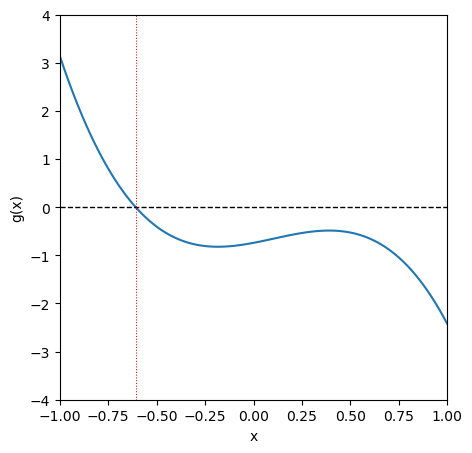

In [21]:
g   = lambda x: -0.74  + 0.765*x + 1.1*x**2 - 3.55*x**3   #g(x)
dg  = lambda x:          0.765   + 2.2*x    - 3*3.55*x**2 #g'(x)
ddg = lambda x:                    2.2      - 2*3*3.55*x  #g''(x)

xspan = np.linspace(-1, 1, 100)

plt.figure(figsize = (5, 5))
plt.plot(xspan, g(xspan))
plt.xlim(-1, 1)
plt.xticks(np.linspace(-1, 1, 9))
plt.xlabel('x')
plt.ylim(-4, 4)
plt.yticks(np.arange(-4, 5, 1))
plt.ylabel('g(x)')
plt.hlines(0, -1, 1, ls = 'dashed', color = 'black', lw = 1.0)
plt.vlines(-0.6081345343, -4, 4, ls = 'dotted', color = 'red', lw = 0.75)
plt.show()

In [22]:
x = -0.5
y = g(x)

while abs(y) > 1e-6:
    y = g(x)
    x = x - g(x)/dg(x)
    print(f'{x:14.10}, {y:14.10}')

 -0.6346955796,       -0.40375
  -0.609247652,   0.1252435048
 -0.6081366095, 0.005031289919
 -0.6081345343, 9.362477129e-06
 -0.6081345343, 3.262889958e-11


In [23]:
############################################################################################################################
# This block of code will get stuck in an infinite loop; if you execute it, you'll need to interrupt the kernel to stop it #
############################################################################################################################

# x = 5/9
# y = g(x)

# while abs(y) > 1e-6:
#     y = g(x)
#     x = x - g(x)/dg(x)
#     print(f'{x:14.10}, {y:14.10}')

In [24]:
opt.newton(g, -0.5) # no derivative information, opt.newton uses secant method
opt.newton(g, -0.5, fprime = dg) #first derivative provided, opt.newton uses Newton-Raphson
opt.newton(g, -0.5, fprime = dg, fprime2 = ddg) #first and second derivative provided, opt.newton uses Halley's Method

np.float64(-0.6081345342894493)

In [25]:
opt.newton(g, 5/9) # no derivative information, opt.newton uses secant method
# opt.newton(g, 5/9, fprime = dg) #first derivative provided, opt.newton uses Newton-Raphson
opt.newton(g, 5/9, fprime = dg, fprime2 = ddg) #first and second derivative provided, opt.newton uses Halley's Method

np.float64(-0.6081345342894493)